# Importing libraries and Function for accuracy calculation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

def classify(path):

  #Part 1: Importing dataset and splitting it into X features and Y Output
  X_array =[]
  Y_array= []
  Y= pd.DataFrame(Y_array)
  X = pd.DataFrame(X_array)

  chunksize = 10
  tfr = pd.read_csv(path, chunksize=chunksize, iterator=True,header= None)
  i=1
  with tfr as reader:
      for chunk in reader:
          X = pd.concat([X,chunk.iloc[:,1:]], axis=0, ignore_index=True)
          Y = pd.concat([Y,chunk.iloc[:, 0]], axis=0, ignore_index=True)
          i=i+1


  #Part 2 Cross validation to split X and Y into training and testing
  from distutils.version import LooseVersion as Version
  from sklearn import __version__ as sklearn_version
  if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
  else:
    from sklearn.model_selection import train_test_split
  print(Version(sklearn_version))
  X_train, X_test, y_train, y_test = train_test_split(
      X, Y.values.ravel(), test_size=0.3, random_state=0
  )

  import os
  print("\nAccuracies of the given dataset: "+ os.path.basename(path))
  del X
  gc.collect()
  del Y
  gc.collect()


  #Part 3 CLassification using different classifiers

  #3.1) Perceptron model
  ppn = Perceptron(eta0=0.01, random_state=0)
  ppn.fit(X_train, y_train)
  y_pred1 = ppn.predict(X_test)
  print('Perceptron Model: %.2f' % accuracy_score(y_test, y_pred1))
  # roc curve for model
  from sklearn.calibration import CalibratedClassifierCV
  clf_isotonic = CalibratedClassifierCV(ppn, cv=10, method='isotonic')
  clf_isotonic.fit(X_train, y_train)

  pred_prob1 = clf_isotonic.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
  auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])




  #3.2) Logistic Regression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the test set result using
  # predict function under LogisticRegression
  y_pred2 = classifier.predict(X_test)
  print('Logistic Regression: %.2f' % accuracy_score(y_test, y_pred2))
  pred_prob2 = classifier.predict_proba(X_test)
  fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
  auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])


  #3.3) Support Vector Machines
  svclassifier = SVC(kernel='linear', probability=True)
  svclassifier.fit(X_train, y_train)
  y_pred3 = svclassifier.predict(X_test)
  print('Support Vector Machine: %.2f' % accuracy_score(y_test, y_pred3))
  pred_prob3 = svclassifier.predict_proba(X_test)
  fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
  auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])


  #3.4) Naive Bayes Classifier
  #Build a Gaussian Classifier
  model = GaussianNB()
  #Model training
  model.fit(X_train, y_train)
  y_pred4 = model.predict(X_test)
  print('Naive Bayes: %.2f' % accuracy_score(y_test, y_pred4))
  pred_prob4 = model.predict_proba(X_test)
  fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
  auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


  #3.5) Decesion Tree Classifier
  #Create Decision Tree classifer object
  clf = DecisionTreeClassifier()
  #Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred5 = clf.predict(X_test)
  print('Decision Tree : %.2f' % accuracy_score(y_test, y_pred5))
  pred_prob5 = clf.predict_proba(X_test)
  fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
  auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

  #3.6)Random Forest Classifier
  # creating a RF classifier
  clf = RandomForestClassifier(n_estimators = 100)
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
  clf.fit(X_train, y_train)
  # performing predictions on the test dataset
  y_pred6 = clf.predict(X_test)
  print('Random Forest: %.2f' % accuracy_score(y_test, y_pred6))
  pred_prob6 = clf.predict_proba(X_test)
  fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
  auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])



  #3.7) KNN Classifier
  knn = KNeighborsClassifier(n_neighbors = 15) #Total samples 2958*0.7. square root of 2958*0.7 is 38.0712
  knn.fit(X_train, y_train)
  y_pred7 = knn.predict(X_test)
  #performing predictions on the test dataset
  print('KNN Classifier: %.2f' % accuracy_score(y_test, y_pred7))
  pred_prob7 = knn.predict_proba(X_test)
  fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
  auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

  #Part 4: Plotting Roc_AUC Curve
  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
  #plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Perceptron Model')
  plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='KNN Classifier')
  plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Support Vector Machine')
  plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Naive Bayes')
  plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Decision Tree ')
  plt.plot(fpr6, tpr6, linestyle='--',color='indigo', label='Random Forest')
  plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

  #Part5 Show AUC Scores of each classifier
  print("AUC Scores of given dataset: "+ os.path.basename(path))
  print('Peceptron AUC Score : %.2f' % auc_score1)
  print('Logistic Regression AUC Score : %.2f' % auc_score2)
  print('SVM AUC Score : %.2f' % auc_score3)
  print('Naive Bayes AUC Score : %.2f' % auc_score4)
  print('Decision Tree AUC Score : %.2f' % auc_score5)
  print('Random Forest AUC Score : %.2f' % auc_score6)
  print('KNN AUC Score : %.2f' % auc_score7)

  #Part6 Precision
  precision1 = precision_score(y_test, y_pred1)  # Calculate precision for Perceptron
  precision2 = precision_score(y_test, y_pred2)  # Calculate precision for Logistic Regression
  precision3 = precision_score(y_test, y_pred3)  # Calculate precision for Support Vector Machine
  precision4 = precision_score(y_test, y_pred4)  # Calculate precision for Naive Bayes
  precision5 = precision_score(y_test, y_pred5)  # Calculate precision for Decision Tree
  precision6 = precision_score(y_test, y_pred6)  # Calculate precision for Random Forest
  precision7 = precision_score(y_test, y_pred7)  # Calculate precision for KNN Classifier

  print("\nPrecision Scores of given dataset: "+ os.path.basename(path))
  print('Perceptron: %.2f' % precision1)
  print('Logistic Regression: %.2f' % precision2)
  print('Support Vector Machine: %.2f' % precision3)
  print('Naive Bayes: %.2f' % precision4)
  print('Decision Tree: %.2f' % precision5)
  print('Random Forest: %.2f' % precision6)
  print('KNN Classifier: %.2f' % precision7)


  #Part7: Recall
  recall1 = recall_score(y_test, y_pred1)  # Calculate recall for Perceptron
  recall2 = recall_score(y_test, y_pred2)  # Calculate recall for Logistic Regression
  recall3 = recall_score(y_test, y_pred3)  # Calculate recall for Support Vector Machine
  recall4 = recall_score(y_test, y_pred4)  # Calculate recall for Naive Bayes
  recall5 = recall_score(y_test, y_pred5)  # Calculate recall for Decision Tree
  recall6 = recall_score(y_test, y_pred6)  # Calculate recall for Random Forest
  recall7 = recall_score(y_test, y_pred7)  # Calculate recall for KNN Classifier

  print("\nRecall Scores of given dataset: "+ os.path.basename(path))
  print('Perceptron: %.2f' % recall1)
  print('Logistic Regression: %.2f' % recall2)
  print('Support Vector Machine: %.2f' % recall3)
  print('Naive Bayes: %.2f' % recall4)
  print('Decision Tree: %.2f' % recall5)
  print('Random Forest: %.2f' % recall6)
  print('KNN Classifier: %.2f' % recall7)



  # Part 8: F1 Score
  f1_score1 = f1_score(y_test, y_pred1)  # Calculate F1 score for Perceptron
  f1_score2 = f1_score(y_test, y_pred2)  # Calculate F1 score for Logistic Regression
  f1_score3 = f1_score(y_test, y_pred3)  # Calculate F1 score for Support Vector Machine
  f1_score4 = f1_score(y_test, y_pred4)  # Calculate F1 score for Naive Bayes
  f1_score5 = f1_score(y_test, y_pred5)  # Calculate F1 score for Decision Tree
  f1_score6 = f1_score(y_test, y_pred6)  # Calculate F1 score for Random Forest
  f1_score7 = f1_score(y_test, y_pred7)  # Calculate F1 score for KNN Classifier

  print("\nF1 Scores of given dataset: "+ os.path.basename(path))
  print('Perceptron: %.2f' % f1_score1)
  print('Logistic Regression: %.2f' % f1_score2)
  print('Support Vector Machine: %.2f' % f1_score3)
  print('Naive Bayes: %.2f' % f1_score4)
  print('Decision Tree: %.2f' % f1_score5)
  print('Random Forest: %.2f' % f1_score6)
  print('KNN Classifier: %.2f' % f1_score7)





# 1 G1020_RESNET50

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: G1020_Resnet50_PCA.csv
Perceptron Model: 0.40


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.36
Support Vector Machine: 0.40
Naive Bayes: 0.93
Decision Tree : 0.98
Random Forest: 0.96
KNN Classifier: 0.84


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


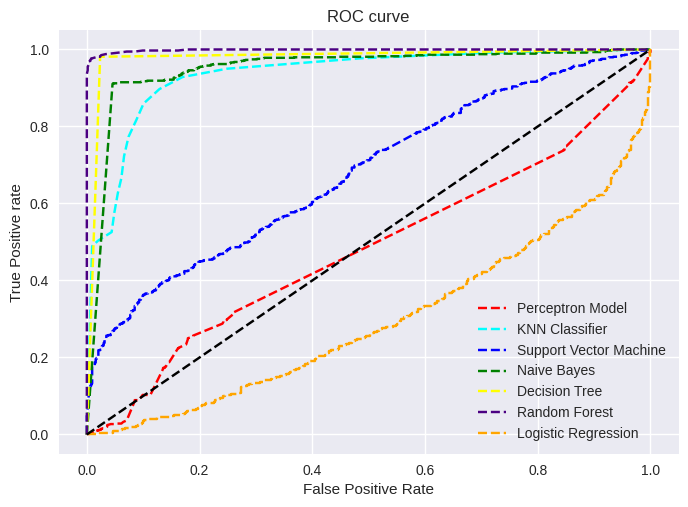

AUC Scores of given dataset: G1020_Resnet50_PCA.csv
Peceptron AUC Score : 0.48
Logistic Regression AUC Score : 0.30
SVM AUC Score : 0.68
Naive Bayes AUC Score : 0.95
Decision Tree AUC Score : 0.98
Random Forest AUC Score : 1.00
KNN AUC Score : 0.94

Precision Scores of given dataset: G1020_Resnet50_PCA.csv
Perceptron: 0.45
Logistic Regression: 0.42
Support Vector Machine: 0.44
Naive Bayes: 0.95
Decision Tree: 0.98
Random Forest: 0.94
KNN Classifier: 0.92

Recall Scores of given dataset: G1020_Resnet50_PCA.csv
Perceptron: 0.47
Logistic Regression: 0.46
Support Vector Machine: 0.47
Naive Bayes: 0.91
Decision Tree: 0.98
Random Forest: 0.99
KNN Classifier: 0.77

F1 Scores of given dataset: G1020_Resnet50_PCA.csv
Perceptron: 0.46
Logistic Regression: 0.44
Support Vector Machine: 0.46
Naive Bayes: 0.93
Decision Tree: 0.98
Random Forest: 0.97
KNN Classifier: 0.84


In [ ]:

#importing or loading the  G1020_RESNET50 dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/G1020_Resnet50_PCA.csv'

classify(path)

# 2 G1020_XCEPTION

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: G1020_Xception_PCA.csv
Perceptron Model: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.68
Support Vector Machine: 0.70
Naive Bayes: 0.59
Decision Tree : 0.68
Random Forest: 0.73
KNN Classifier: 0.73


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


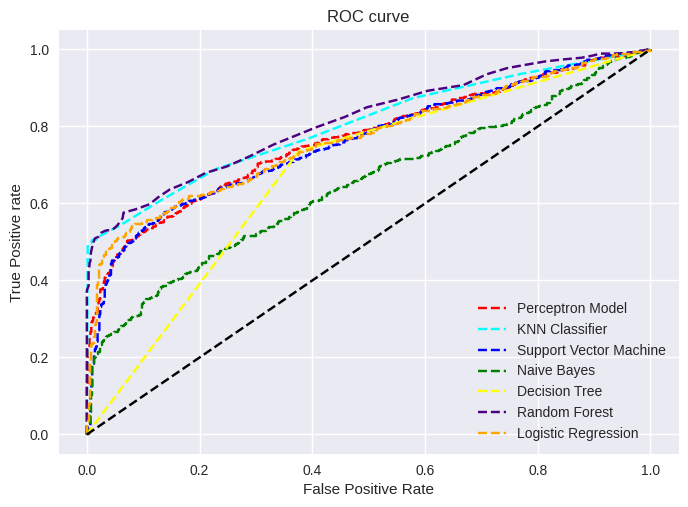

AUC Scores of given dataset: G1020_Xception_PCA.csv
Peceptron AUC Score : 0.77
Logistic Regression AUC Score : 0.77
SVM AUC Score : 0.76
Naive Bayes AUC Score : 0.65
Decision Tree AUC Score : 0.68
Random Forest AUC Score : 0.82
KNN AUC Score : 0.80

Precision Scores of given dataset: G1020_Xception_PCA.csv
Perceptron: 0.71
Logistic Regression: 0.74
Support Vector Machine: 0.77
Naive Bayes: 0.61
Decision Tree: 0.70
Random Forest: 0.85
KNN Classifier: 0.85

Recall Scores of given dataset: G1020_Xception_PCA.csv
Perceptron: 0.70
Logistic Regression: 0.65
Support Vector Machine: 0.62
Naive Bayes: 0.71
Decision Tree: 0.74
Random Forest: 0.62
KNN Classifier: 0.61

F1 Scores of given dataset: G1020_Xception_PCA.csv
Perceptron: 0.71
Logistic Regression: 0.69
Support Vector Machine: 0.69
Naive Bayes: 0.65
Decision Tree: 0.72
Random Forest: 0.72
KNN Classifier: 0.71


In [ ]:
# importing or loading the  G1020_XCEPTION dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/G1020_Xception_PCA.csv'

classify(path)

# 3 G1020_INCEPTIONV3

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: G1020_InceptionV3_PCA.csv
Perceptron Model: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.72
Support Vector Machine: 0.73
Naive Bayes: 0.70
Decision Tree : 0.68
Random Forest: 0.74
KNN Classifier: 0.70


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


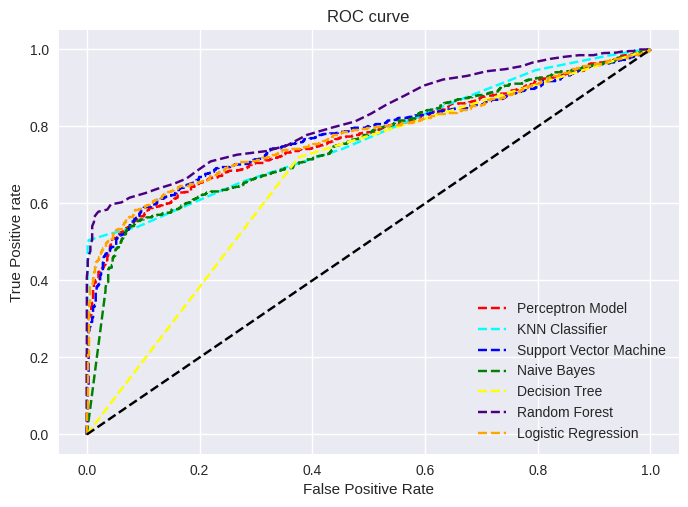

AUC Scores of given dataset: G1020_InceptionV3_PCA.csv
Peceptron AUC Score : 0.77
Logistic Regression AUC Score : 0.78
SVM AUC Score : 0.78
Naive Bayes AUC Score : 0.76
Decision Tree AUC Score : 0.67
Random Forest AUC Score : 0.82
KNN AUC Score : 0.77

Precision Scores of given dataset: G1020_InceptionV3_PCA.csv
Perceptron: 0.75
Logistic Regression: 0.77
Support Vector Machine: 0.80
Naive Bayes: 0.78
Decision Tree: 0.69
Random Forest: 0.79
KNN Classifier: 0.81

Recall Scores of given dataset: G1020_InceptionV3_PCA.csv
Perceptron: 0.66
Logistic Regression: 0.68
Support Vector Machine: 0.66
Naive Bayes: 0.63
Decision Tree: 0.72
Random Forest: 0.71
KNN Classifier: 0.58

F1 Scores of given dataset: G1020_InceptionV3_PCA.csv
Perceptron: 0.70
Logistic Regression: 0.72
Support Vector Machine: 0.72
Naive Bayes: 0.69
Decision Tree: 0.71
Random Forest: 0.75
KNN Classifier: 0.68


In [ ]:
# importing or loading the  G1020_XCEPTION dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/G1020_InceptionV3_PCA.csv'

classify(path)

# 4 G1020_VGG16

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: G1020_VGG16_PCA.csv
Perceptron Model: 0.94
Logistic Regression: 0.96
Support Vector Machine: 0.94
Naive Bayes: 0.66
Decision Tree : 0.79
Random Forest: 0.87
KNN Classifier: 0.79


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


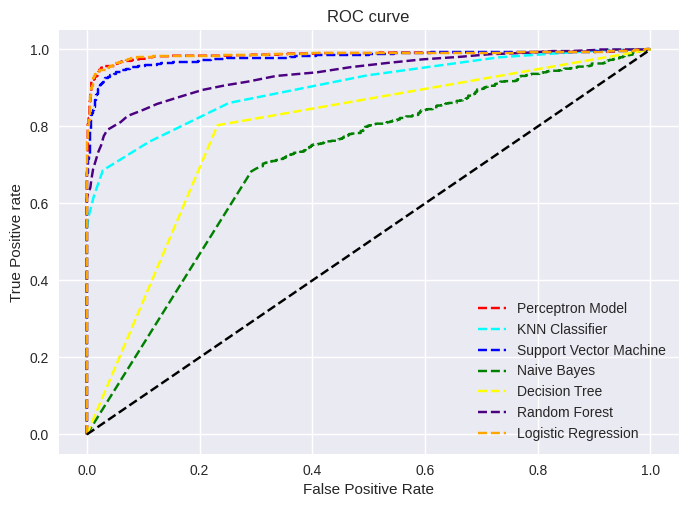

AUC Scores of given dataset: G1020_VGG16_PCA.csv
Peceptron AUC Score : 0.99
Logistic Regression AUC Score : 0.99
SVM AUC Score : 0.98
Naive Bayes AUC Score : 0.71
Decision Tree AUC Score : 0.79
Random Forest AUC Score : 0.94
KNN AUC Score : 0.90

Precision Scores of given dataset: G1020_VGG16_PCA.csv
Perceptron: 0.95
Logistic Regression: 0.98
Support Vector Machine: 0.95
Naive Bayes: 0.66
Decision Tree: 0.80
Random Forest: 0.93
KNN Classifier: 0.98

Recall Scores of given dataset: G1020_VGG16_PCA.csv
Perceptron: 0.94
Logistic Regression: 0.94
Support Vector Machine: 0.94
Naive Bayes: 0.79
Decision Tree: 0.80
Random Forest: 0.83
KNN Classifier: 0.62

F1 Scores of given dataset: G1020_VGG16_PCA.csv
Perceptron: 0.94
Logistic Regression: 0.96
Support Vector Machine: 0.95
Naive Bayes: 0.72
Decision Tree: 0.80
Random Forest: 0.88
KNN Classifier: 0.76


In [ ]:
# importing or loading the  G1020_VGG16 dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/G1020_VGG16_PCA.csv'
classify(path)

# 5 ORIGA_GRAY_RESNET50

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: ORIGA_Gray_ResNet50_PCA.csv
Perceptron Model: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree : 1.00
Random Forest: 1.00
KNN Classifier: 0.99


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


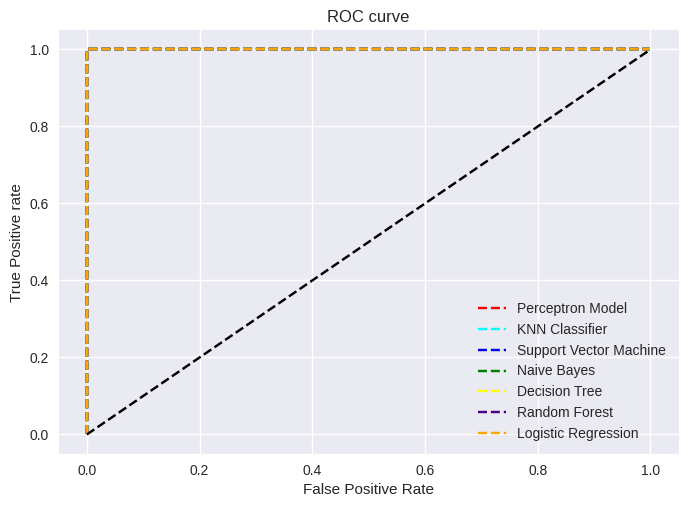

AUC Scores of given dataset: ORIGA_Gray_ResNet50_PCA.csv
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 1.00
Decision Tree AUC Score : 1.00
Random Forest AUC Score : 1.00
KNN AUC Score : 1.00

Precision Scores of given dataset: ORIGA_Gray_ResNet50_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 0.99

Recall Scores of given dataset: ORIGA_Gray_ResNet50_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00

F1 Scores of given dataset: ORIGA_Gray_ResNet50_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 0.99


In [ ]:
# importing or loading the  ORIGA_GRAY_RESNET50 dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/ORIGA_Gray_ResNet50_PCA.csv'

classify(path)

# 6 ORIGA_GRAY_XCEPTION



<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: ORIGA_Gray_Xception_PCA.csv
Perceptron Model: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree : 1.00
Random Forest: 1.00
KNN Classifier: 0.99


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


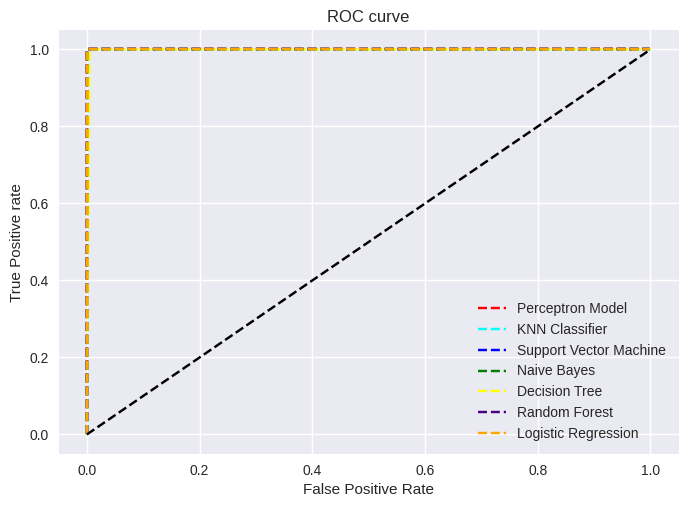

AUC Scores of given dataset: ORIGA_Gray_Xception_PCA.csv
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 1.00
Decision Tree AUC Score : 1.00
Random Forest AUC Score : 1.00
KNN AUC Score : 1.00

Precision Scores of given dataset: ORIGA_Gray_Xception_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 0.97

Recall Scores of given dataset: ORIGA_Gray_Xception_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00

F1 Scores of given dataset: ORIGA_Gray_Xception_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 0.99


In [ ]:
# importing or loading the  ORIGA_GRAY_XCEPTION dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/ORIGA_Gray_Xception_PCA.csv'

classify(path)

# 7 ORIGA_GRAY_INCEPTIONV3

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: ORIGA_Gray_InceptionV3_PCA.csv
Perceptron Model: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree : 1.00
Random Forest: 1.00
KNN Classifier: 1.00


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


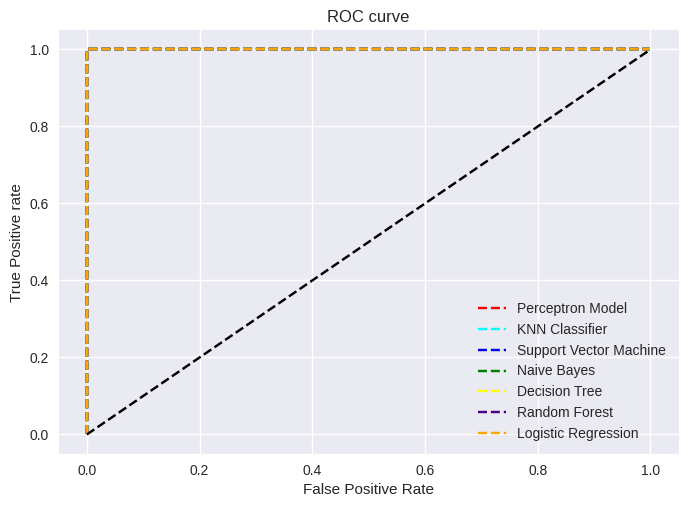

AUC Scores of given dataset: ORIGA_Gray_InceptionV3_PCA.csv
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 1.00
Decision Tree AUC Score : 1.00
Random Forest AUC Score : 1.00
KNN AUC Score : 1.00

Precision Scores of given dataset: ORIGA_Gray_InceptionV3_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00

Recall Scores of given dataset: ORIGA_Gray_InceptionV3_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00

F1 Scores of given dataset: ORIGA_Gray_InceptionV3_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00


In [ ]:
# importing or loading the  ORIGA_GRAY_INCEPTIONV3 dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/ORIGA_Gray_InceptionV3_PCA.csv'
classify(path)

# 8 ORIGA_GRAY_VGG_16

<ipython-input-28-608389a6a090>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-28-608389a6a090>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: ORIGA_Gray_VGG16_PCA.csv
Perceptron Model: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree : 1.00
Random Forest: 1.00
KNN Classifier: 1.00


<ipython-input-28-608389a6a090>:134: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


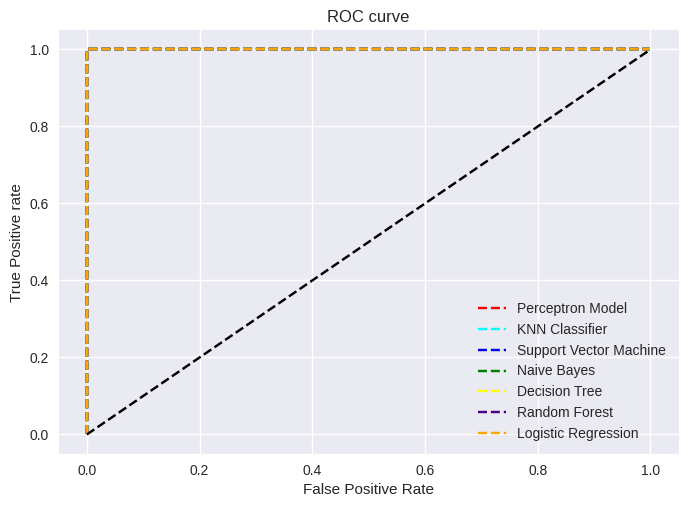

AUC Scores of given dataset: ORIGA_Gray_VGG16_PCA.csv
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 1.00
Decision Tree AUC Score : 1.00
Random Forest AUC Score : 1.00
KNN AUC Score : 1.00

Precision Scores of given dataset: ORIGA_Gray_VGG16_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00

Recall Scores of given dataset: ORIGA_Gray_VGG16_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00

F1 Scores of given dataset: ORIGA_Gray_VGG16_PCA.csv
Perceptron: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Naive Bayes: 1.00
Decision Tree: 1.00
Random Forest: 1.00
KNN Classifier: 1.00


In [ ]:
# importing or loading the  origa_gray_vgg16 dataset
path= '/content/drive/MyDrive/Early-stage-Glaucoma-Eye-Disease-Detection/Pca_Features/ORIGA_Gray_VGG16_PCA.csv'
classify(path)